# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename, header=0)

df.head(10)

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,Laurie,"New York, New York, United States","Hello, \r\nI will be welcoming and helpful, w...",1.00,1.00,True,3.0,...,4.82,4.87,4.73,False,3,1,2,0,1.48,7
6,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,Allen & Irina,"New York, New York, United States",We love to travel. When we travel we like to s...,1.00,1.00,True,1.0,...,4.80,4.67,4.57,True,1,1,0,0,1.24,7
7,UES Beautiful Blue Room,Beautiful peaceful healthy home<br /><br /><b>...,"Location: Five minutes to Central Park, Museum...",Cyn,"New York, New York, United States",Capturing the Steinbeck side of life in its Fi...,1.00,1.00,True,3.0,...,4.95,4.84,4.84,True,1,0,1,0,1.82,5
8,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",Joelle,"New York, New York, United States",I have lived in the same apartment in Brooklyn...,1.00,0.00,True,2.0,...,5.00,5.00,5.00,False,2,0,2,0,0.07,5
9,Perfect for Your Parents: Privacy + Garden,"Parents/grandparents coming to town, or are yo...","Residential, village-like atmosphere. Lots of ...",Jane,"New York, New York, United States",I have been an Airbnb host since 2009 -- just ...,1.00,0.99,True,1.0,...,4.91,4.93,4.78,True,2,1,1,0,3.05,8


In [3]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

In [4]:
df.shape

(28022, 50)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

The data set I have choosen is airbnbListingsData.csv.
I will be predicting the price of an Airbnb listing. The label is price.
This is a supervised learning problem, specifically regression problem. 
There are a lot of features. Ex: description', 'neighborhood_overview',  'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities','minimum_nights', 'maximum_nights'
It is an important problem because predicting the price of Airbnb listings is crucial for both the website and the customers. Accurate price predictions can help hosts set competitive and fair prices, ensuring higher occupancy rates and maximizing their revenue. 


## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
df.describe

<bound method NDFrame.describe of                                                     name  \
0                                  Skylit Midtown Castle   
1      Whole flr w/private bdrm, bath & kitchen(pls r...   
2               Spacious Brooklyn Duplex, Patio + Garden   
3                       Large Furnished Room Near B'way　   
4                     Cozy Clean Guest Room - Family Apt   
...                                                  ...   
28017                            Astoria Luxury suite 2A   
28018  Newly renovated suite in the heart of Williams...   
28019      Perfect Room to Stay in Brooklyn! Near Metro!   
28020       New Beautiful Modern One Bedroom in Brooklyn   
28021    Large, modern, private 1 bedroom in beach condo   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2      We welcome you to stay in our lovely 2 br dupl...   
3    

In [6]:
df['price']

0         150.0
1          75.0
2         275.0
3          68.0
4          75.0
          ...  
28017      89.0
28018    1000.0
28019      64.0
28020      84.0
28021      70.0
Name: price, Length: 28022, dtype: float64

In [7]:
df['price'].dtype

dtype('float64')

In [8]:
import scipy.stats as stats
df['label_price'] = stats.mstats.winsorize(df['price'], limits=[0.01, 0.01])

In [9]:
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,label_price
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.86,4.41,False,3,3,0,0,0.33,9,150.0
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.71,4.64,False,1,1,0,0,4.86,6,75.0
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,4.50,5.00,False,1,1,0,0,0.02,3,275.0
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.87,4.36,False,1,0,1,0,3.68,4,68.0
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.94,4.92,False,1,0,1,0,0.87,7,75.0


In [10]:
(df['price']-df['label_price']).unique()

array([  0.,   1., 101.,  51.,  -1., 100.,  58.,  81.,  26.,  96.,  15.,
        25.,  41.,   6.,   7.,  46.,  83.,  99.,  44.,  43.,  93.,  78.,
        71.,   2.,  87.,  86.,  50.,  12.])

In [11]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

In [12]:
nan_detected = nan_count!=0
nan_detected

name                                             True
description                                      True
neighborhood_overview                            True
host_name                                       False
host_location                                    True
host_about                                       True
host_response_rate                               True
host_acceptance_rate                             True
host_is_superhost                               False
host_listings_count                             False
host_total_listings_count                       False
host_has_profile_pic                            False
host_identity_verified                          False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                    False
bathrooms                                       False
bedrooms                                         True
beds                        

In [13]:
is_int_or_float = (df.dtypes == 'int64') | (df.dtypes == 'float64')
is_int_or_float

name                                            False
description                                     False
neighborhood_overview                           False
host_name                                       False
host_location                                   False
host_about                                      False
host_response_rate                               True
host_acceptance_rate                             True
host_is_superhost                               False
host_listings_count                              True
host_total_listings_count                        True
host_has_profile_pic                            False
host_identity_verified                          False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                     True
bathrooms                                        True
bedrooms                                         True
beds                        

In [14]:
to_impute = nan_detected & is_int_or_float
to_impute

name                                            False
description                                     False
neighborhood_overview                           False
host_name                                       False
host_location                                   False
host_about                                      False
host_response_rate                               True
host_acceptance_rate                             True
host_is_superhost                               False
host_listings_count                             False
host_total_listings_count                       False
host_has_profile_pic                            False
host_identity_verified                          False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                    False
bathrooms                                       False
bedrooms                                         True
beds                        

In [15]:
df.columns[to_impute]

Index(['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds'], dtype='object')

In [16]:
to_impute_selected = ['host_response_rate', 'host_acceptance_rate','bedrooms', 'beds']

In [17]:
for colname in to_impute_selected:
    df[colname +'_na'] = df[colname].isnull()

In [18]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

In [19]:
for colname in to_impute_selected:
    df[colname].fillna(np.mean(df[colname]), inplace=True)

In [20]:
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, 
                                           np.sum(df[colname].isnull(), axis = 0)))

host_response_rate missing values count :0
host_acceptance_rate missing values count :0
bedrooms missing values count :0
beds missing values count :0


In [21]:
to_encode = list(df.select_dtypes(include=['object']).columns)
df[to_encode].nunique()

name                            27386
description                     25952
neighborhood_overview           15800
host_name                        7566
host_location                    1364
host_about                      11962
neighbourhood_group_cleansed        5
room_type                           4
amenities                       25020
dtype: int64

In [22]:
print(df['neighbourhood_group_cleansed'].unique())
print(df['room_type'].unique())

['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']


In [23]:
df_room_type = pd.get_dummies(df['room_type'], prefix='room_type_')
df = df.join(df_room_type)
df.drop(columns = 'room_type', inplace=True)

In [24]:
df_neighbourhood_group_cleansed = pd.get_dummies(df['neighbourhood_group_cleansed'], prefix='neighbourhood_group_cleansed_')
# Concatenate DataFrame df with the one-hot encoded DataFrame df_room_type
df = df.join(df_neighbourhood_group_cleansed)
# Remove the original 'room_type' column from DataFrame df
df.drop(columns = 'neighbourhood_group_cleansed', inplace=True)

In [25]:
df.head

<bound method NDFrame.head of                                                     name  \
0                                  Skylit Midtown Castle   
1      Whole flr w/private bdrm, bath & kitchen(pls r...   
2               Spacious Brooklyn Duplex, Patio + Garden   
3                       Large Furnished Room Near B'way　   
4                     Cozy Clean Guest Room - Family Apt   
...                                                  ...   
28017                            Astoria Luxury suite 2A   
28018  Newly renovated suite in the heart of Williams...   
28019      Perfect Room to Stay in Brooklyn! Near Metro!   
28020       New Beautiful Modern One Bedroom in Brooklyn   
28021    Large, modern, private 1 bedroom in beach condo   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2      We welcome you to stay in our lovely 2 br dupl...   
3      Pl

In [26]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

I do have a new feature list. I am removing name, description, neighborhood_overview, host_name, host_location, host_about, amenities. 

Start with baseline models such as Linear Regression and Decision Trees.
Evaluate more complex models like Random Forest, Gradient Boosting to see if they improve performance.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [28]:
y = df['label_price']
X = df.drop(columns = ['label_price','name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'amenities'])

In [29]:
#Create Training and Test Data Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)
print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 7.522444150384668
[LR] R2: 0.9969067479861312


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [51]:
model = LinearRegression()
score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_rmse = -score.mean()
mean_rmse

112.62353178850306

Something is wrong. Why is my RMSE so high for LR 😭

In [31]:
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [32]:
dt_model = DecisionTreeRegressor()
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='neg_mean_squared_error')
dt_grid_search.fit(X_train, y_train)
print("Best Parameters for DecisionTreeRegressor:")
print(dt_grid_search.best_params_)


Best Parameters for DecisionTreeRegressor:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [39]:
dt_model = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 2, min_samples_split = 5)
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)
print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.2740197057294709
[DT] R2: 0.9999958954934651


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The Decision Tree Regressor shows a significantly lower RMSE and a much higher R² score compared to Linear Regression. This suggests that the Decision Tree model is performing extremely well on your test data, fitting the training data very closely.
However, there is also a change of it overfitting. So we can tune the hyperparameters: max_depth, min_samples_split, and min_samples_leaf to prevent overfitting.

In [46]:
gbdt_model = GradientBoostingRegressor(max_depth = 32, n_estimators = 200)
gbdt_model.fit(X_train, y_train)
y_GBDT_pred = gbdt_model.predict(X_test)
gbdt_rmse = mean_squared_error(y_test, y_GBDT_pred, squared=False)
gbdt_r2 = r2_score(y_test, y_GBDT_pred)
print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))

[GBDT] Root Mean Squared Error: 0.21599565693713496
[GBDT] R2: 0.9999974497227435


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
rf_model = RandomForestRegressor(max_depth = 32, n_estimators = 200)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))

[RF] Root Mean Squared Error: 0.145592624505629
[RF] R2: 0.999998841286385


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


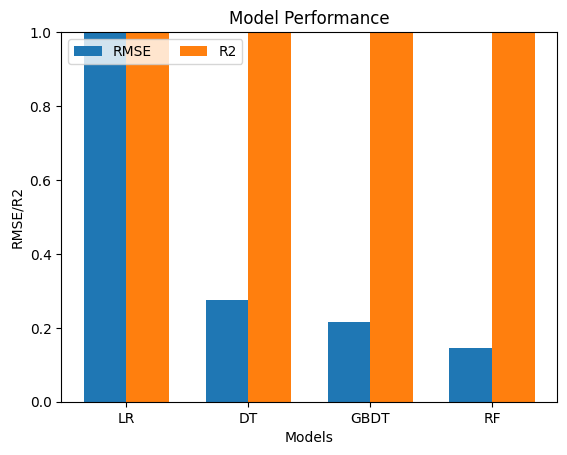

In [47]:
RMSE_Results = [lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [lr_r2, dt_r2, gbdt_r2, rf_r2]
rg= np.arange(4)
width = 0.35

plt.bar(rg, RMSE_Results, width, label="RMSE")

plt.bar(rg+width, R2_Results, width, label='R2')
labels = ['LR', 'DT', 'GBDT', 'RF']
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

RF is the best performing model. In terms of RMSE the lower the score the better since it indicates better model performance in terms of prediction accuracy and RF has the lowest score. In terms of R2 score the higher the value the better and they have 